# Document Understanding Cookbook

---

## Use our built-in Document Understanding feature

Optical Character Recognition (OCR) transforms text-based documents and images into pure text outputs and markdown. By leveraging this feature, you can enable any Large Language Model (LLM) to reliably understand documents efficiently and cost-effectively.

In this guide, we will demonstrate how to use OCR with our models to discuss any text-based document, whether it's a PDF, photo, or screenshot, via URLs and our built-in feature.

---

### Method
This method will make use of our built-in feature that leverages OCR, we will extract the URLs with regex and call our models with this feature.

## Built-In
Mistral provides a built-in feature that leverages OCR with all models. By providing a URL pointing to a document, you can extract text data that will be provided to the model.

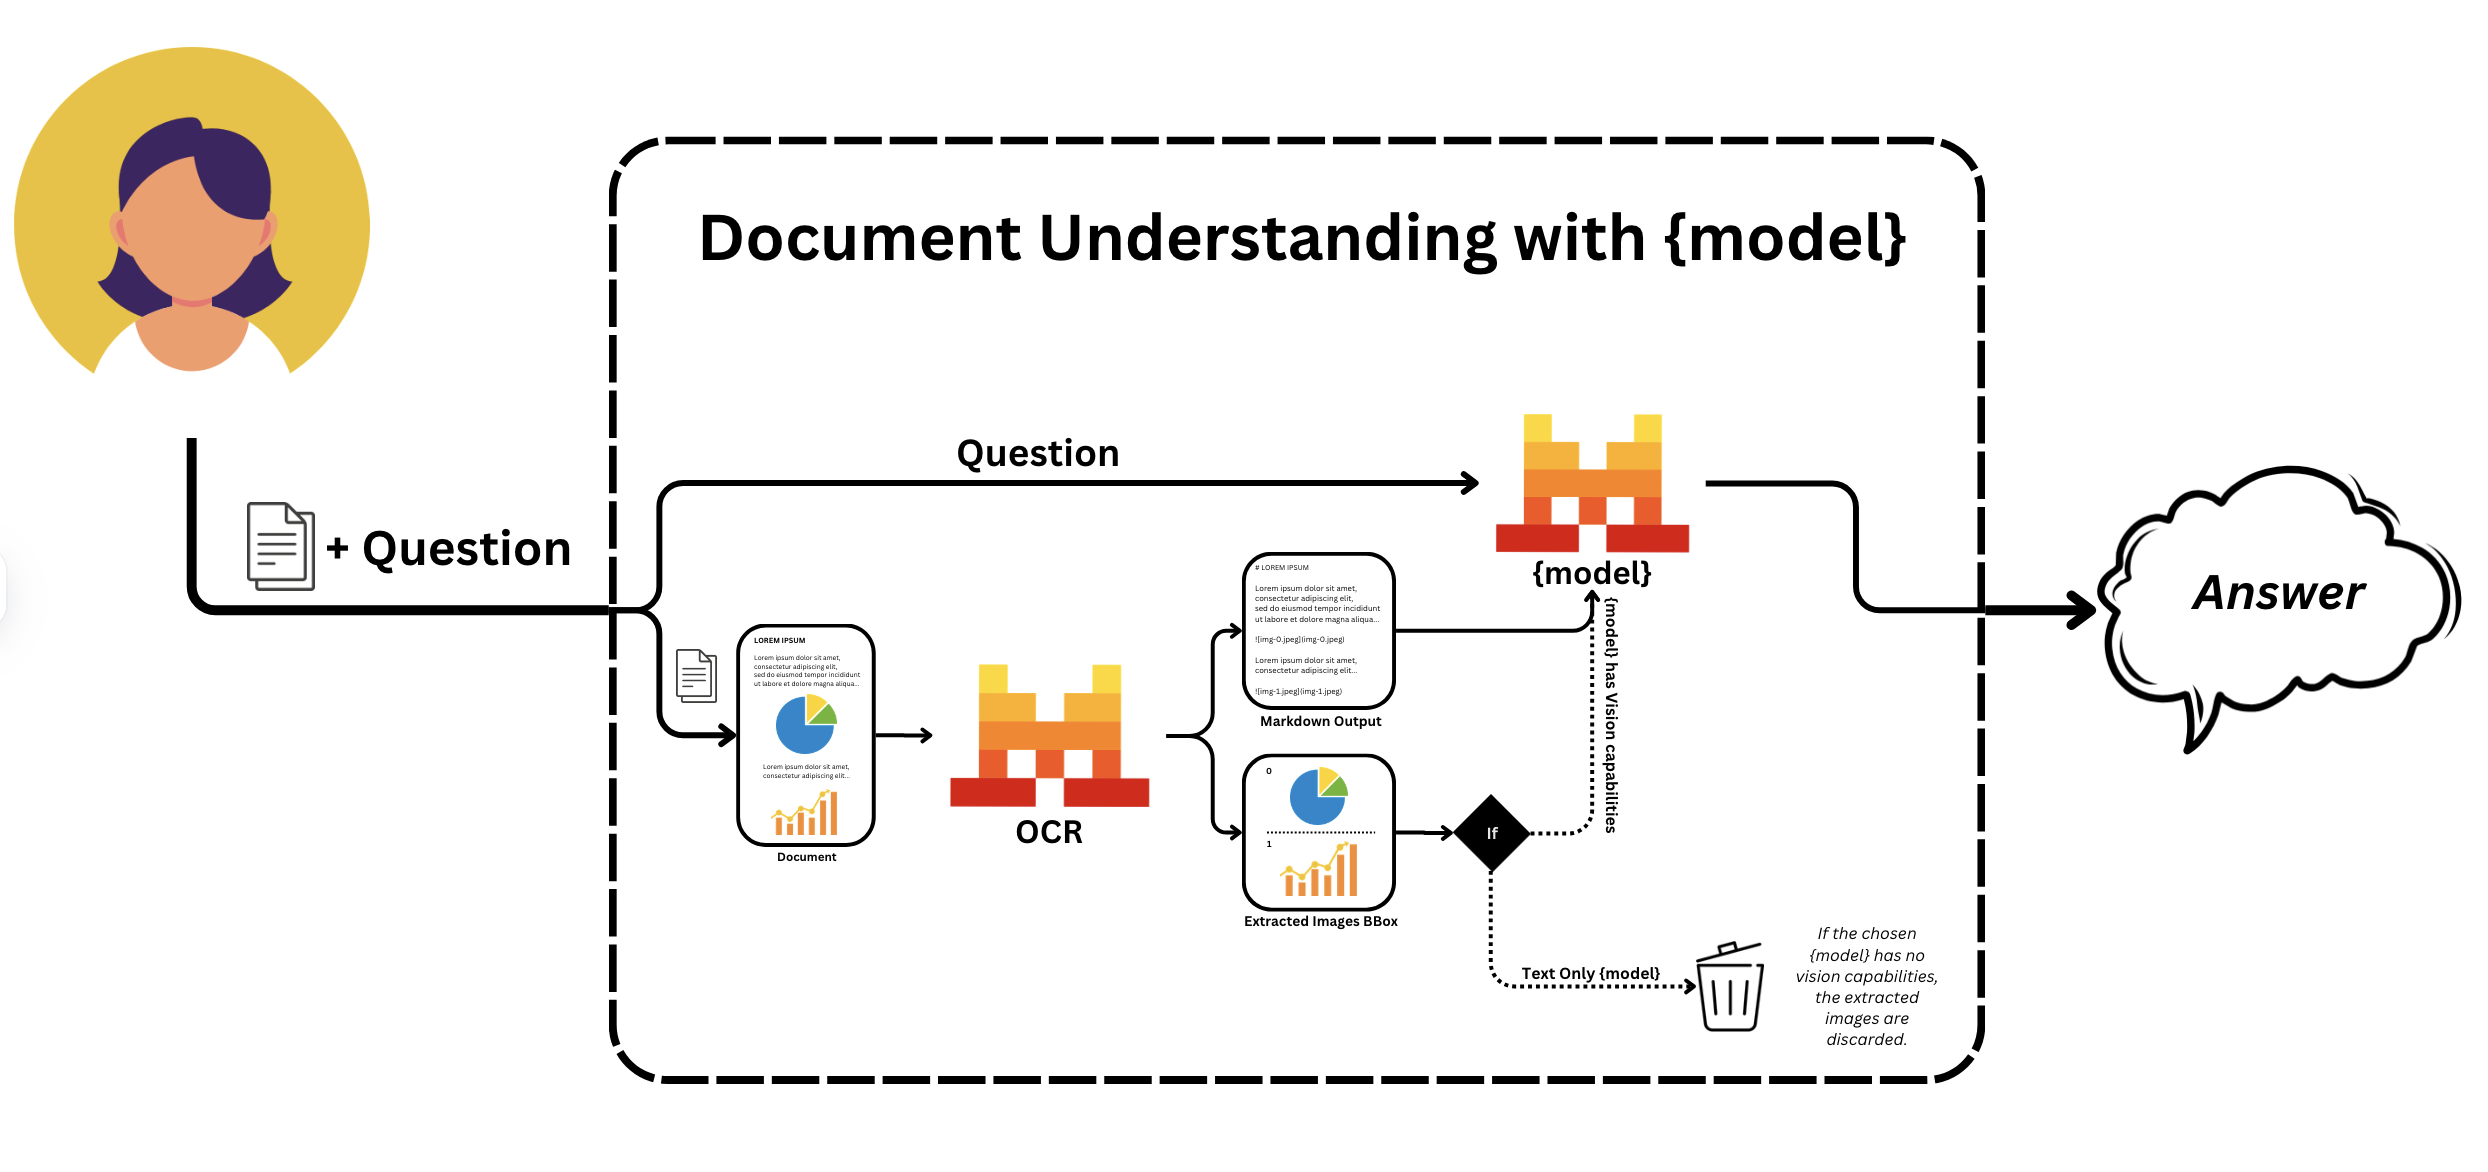

Following, there is a simple, quick, example of how to make use of this feature by extracting PDF URLs with regex and uploading them as a `document_url`.

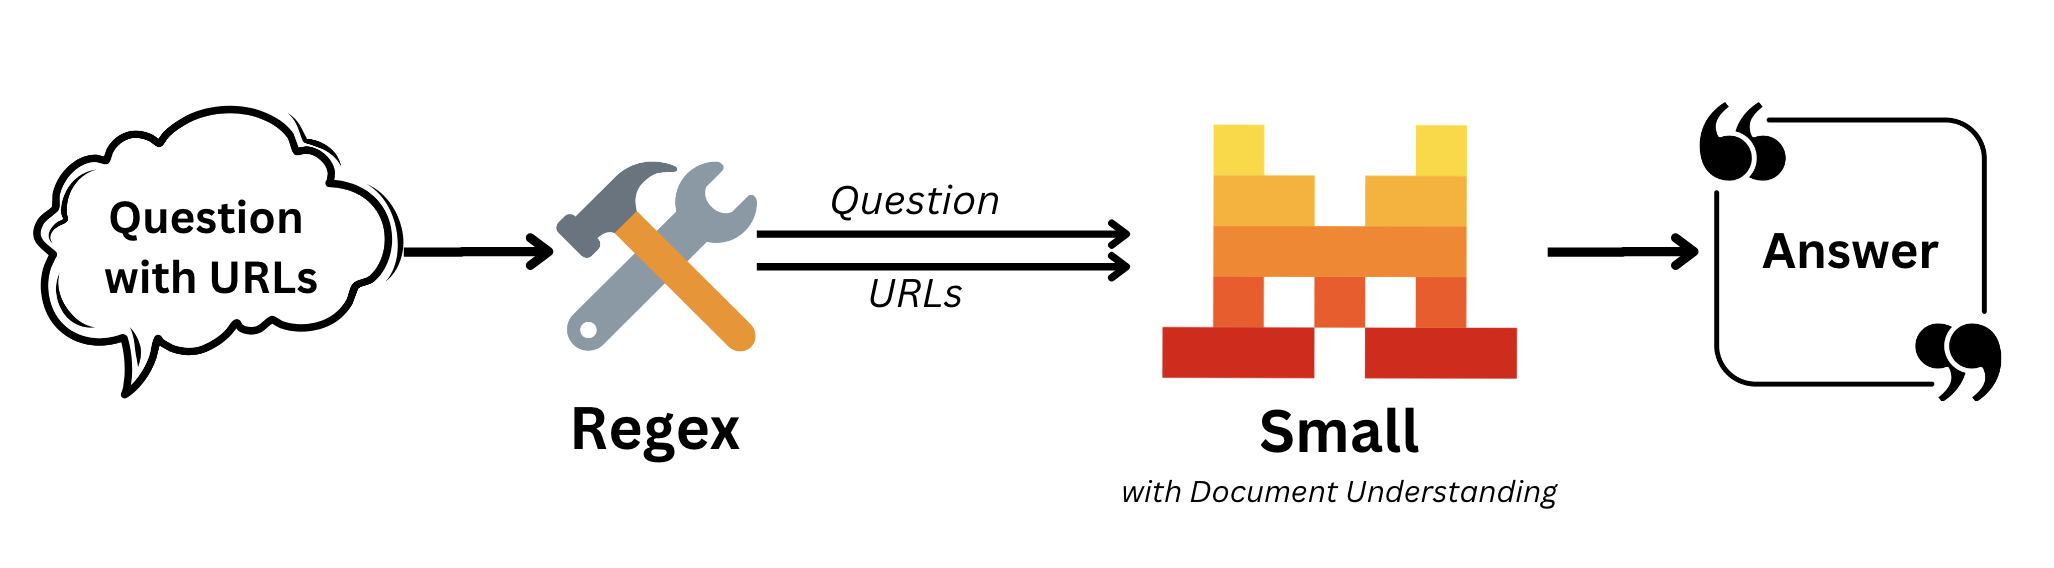

Learn more about Document Understanding [here](https://docs.mistral.ai/capabilities/OCR/document_understanding/).


### Setup
First, let's install `mistralai`

In [ ]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 10.5 MB/s eta 0:00:00


We can now set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [ ]:
from mistralai import Mistral

api_key = "API_KEY"
client = Mistral(api_key=api_key)
text_model = "mistral-small-latest"

### System and Regex
Let's define a simple system prompt, since there is no tool call required for this demo we can be fairly straightforward.

In [ ]:
system = "You are an AI Assistant with document understanding via URLs. You may be provided with URLs, followed by their corresponding OCR."

To extract the URLs, we will use regex to extract any URL pattern from the user query.

*Note: We will assume there will only be PDF files for simplicity.*

In [ ]:
import re

def extract_urls(text: str) -> list:
    url_pattern = r'\b((?:https?|ftp)://(?:www\.)?[^\s/$.?#].[^\s]*)\b'
    urls = re.findall(url_pattern, text)
    return urls

# Example
extract_urls("Hi there, you can visit our docs in our website https://docs.mistral.ai/, we cannot wait to see what you will build with us.")

['https://docs.mistral.ai']

### Test
We can now try it out, we setup so that for each query all urls are extracted and added to the query properly.

#### Example Prompts ( PDFs )
- Could you summarize what this research paper talks about? https://arxiv.org/pdf/2410.07073
- Explain this architecture: https://arxiv.org/abs/2401.04088

In [ ]:
import json

messages = [{"role": "system", "content": system}]
while True:
    user_input = input("User > ")
    if user_input.lower() == "quit":
        break

    # Extract URLs from the user input, assuming they are always PDFs
    document_urls = extract_urls(user_input)
    user_message_content = [{"type": "text", "text": user_input}]
    for url in document_urls:
        user_message_content.append({"type": "document_url", "document_url": url})
    messages.append({"role": "user", "content": user_message_content})

    # Send the messages to the model and get a response
    response = client.chat.complete(
        model=text_model,
        messages=messages,
        temperature=0
    )
    messages.append({"role": "assistant", "content": response.choices[0].message.content})

    print("Assistant >", response.choices[0].message.content)


User > Could you summarize what this research paper talks about? https://arxiv.org/pdf/2410.07073
Assistant > The research paper titled "Pixtral 12B" introduces a 12-billion-parameter multimodal language model named Pixtral 12B. This model is designed to understand both natural images and documents, achieving leading performance on various multimodal benchmarks while also excelling in text-only tasks. Unlike many open-source models, Pixtral 12B does not compromise on natural language performance to excel in multimodal tasks.

### Key Features and Contributions:

1. **Multimodal Capabilities**:
   - Pixtral 12B is trained to handle both images and text, making it versatile for a wide range of applications.
   - It uses a new vision encoder trained from scratch, allowing it to ingest images at their natural resolution and aspect ratio, providing flexibility in the number of tokens used to process an image.

2. **Performance**:
   - The model outperforms other open models of similar sizes